# Projeto Data Science: Análise Vendas Beach Tennis

In [ ]:
# 1. Importar bibliotecas.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")
%matplotlib inline

In [ ]:
# 2. Upload e leitura dos dados.
from google.colab import files
uploaded = files.upload()  # Faça upload do arquivo Base Dados.xlsx

df = pd.read_excel('Base Dados.xlsx')

print("Dados carregados:")
print(df.head())
print("\nInformações gerais:")
print(df.info())

Saving Base Dados.xlsx to Base Dados.xlsx
Dados carregados:
   Mes   Ano            Segmento Estado   Regiao  IDSubcategoriaProduto  \
0    1  2022  Loja Especializada     RJ  Sudeste                    603   
1    1  2022  Loja Especializada     SP  Sudeste                    602   
2    1  2022  Loja Especializada     SP  Sudeste                    603   
3    1  2022  Loja Especializada     RJ  Sudeste                    202   
4    1  2022  Loja Especializada     RJ  Sudeste                    203   

   QuantidadeItens  
0                2  
1                1  
2                2  
3               22  
4               11  

Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24543 entries, 0 to 24542
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Mes                    24543 non-null  int64 
 1   Ano                    24543 non-null  int64 
 2   Segmento               24

In [ ]:
# 3. Limpeza e padronização.
df['Regiao'] = df['Regiao'].str.strip().str.title()
df['Segmento'] = df['Segmento'].str.strip().str.title()
df['Mes'] = df['Mes'].astype(int)
df['Ano'] = df['Ano'].astype(int)
df['QuantidadeItens'] = df['QuantidadeItens'].astype(int)

print("\nValores faltantes por coluna:")
print(df.isnull().sum())


Valores faltantes por coluna:
Mes                      0
Ano                      0
Segmento                 0
Estado                   0
Regiao                   0
IDSubcategoriaProduto    0
QuantidadeItens          0
dtype: int64


## 4. Hipóteses (comentários para guiar a análise)
- Hipótese 1: A região Sudeste concentra a maior parte das vendas.
- Hipótese 2: Segmentos específicos, como 'Loja Especializada', apresentam maiores vendas.
- Hipótese 3: Vendas apresentam sazonalidade ao longo do ano.

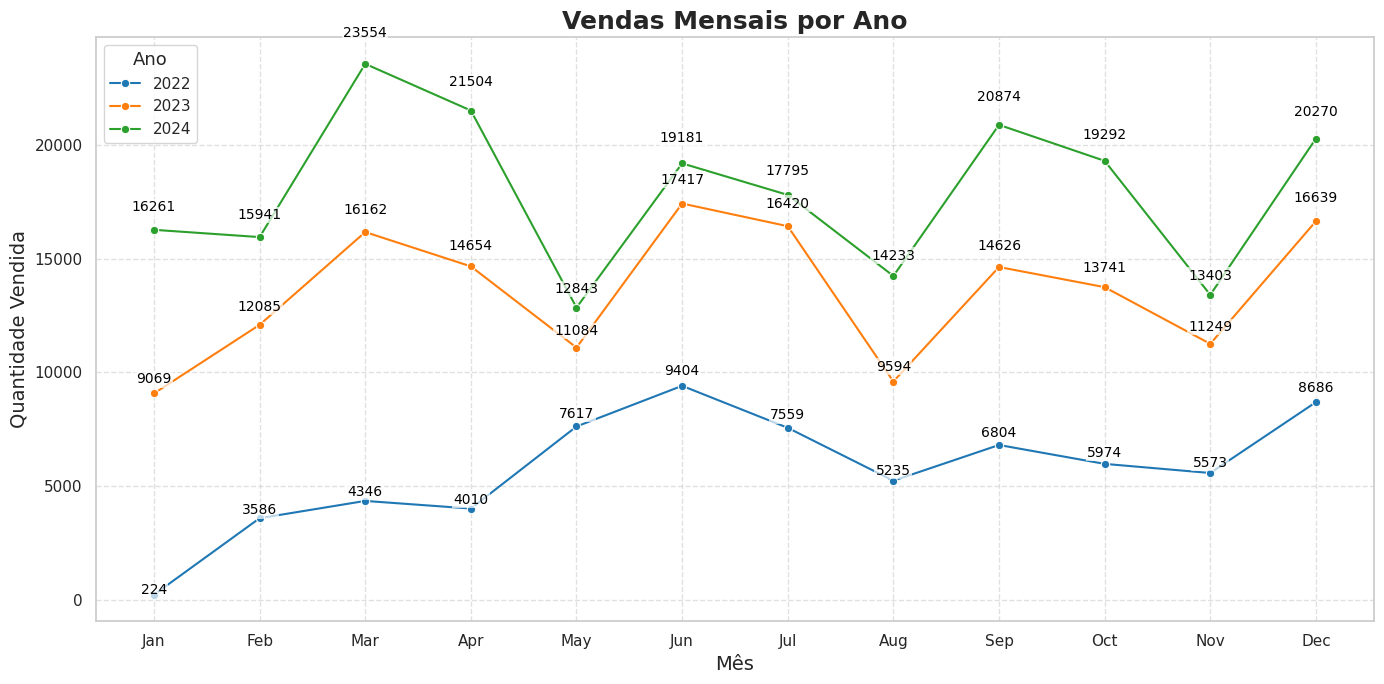

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Carregar o arquivo Excel
arquivo = 'Base Dados.xlsx'  # ajuste o caminho se necessário
df = pd.read_excel(arquivo)

# Agrupar dados por Ano e Mês somando a QuantidadeItens
vendas_mes_ano = df.groupby(['Ano', 'Mes'])['QuantidadeItens'].sum().reset_index()

# Configurar tamanho da figura
plt.figure(figsize=(14,7))

# Paleta de cores para diferenciar os anos
palette = sns.color_palette("tab10", n_colors=vendas_mes_ano['Ano'].nunique())

# Plotar linha com pontos para cada ano
sns.lineplot(
    data=vendas_mes_ano,
    x='Mes',
    y='QuantidadeItens',
    hue='Ano',
    marker='o',
    palette=palette
)

# Adicionar valores nos pontos com fundo branco para legibilidade
for ano in vendas_mes_ano['Ano'].unique():
    dados_ano = vendas_mes_ano[vendas_mes_ano['Ano'] == ano]
    for _, row in dados_ano.iterrows():
        plt.text(
            row['Mes'],
            row['QuantidadeItens'] + row['QuantidadeItens'] * 0.05,  # deslocamento dinâmico
            f"{int(row['QuantidadeItens'])}",
            horizontalalignment='center',
            size='small',
            color='black',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1)
        )

# Títulos e legendas
plt.title('Vendas Mensais por Ano', fontsize=18, weight='bold')
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Quantidade Vendida', fontsize=14)
plt.xticks(ticks=range(1,13), labels=[calendar.month_abbr[m] for m in range(1,13)])
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Ano', title_fontsize='13', loc='best', frameon=True)
plt.tight_layout()
plt.show()


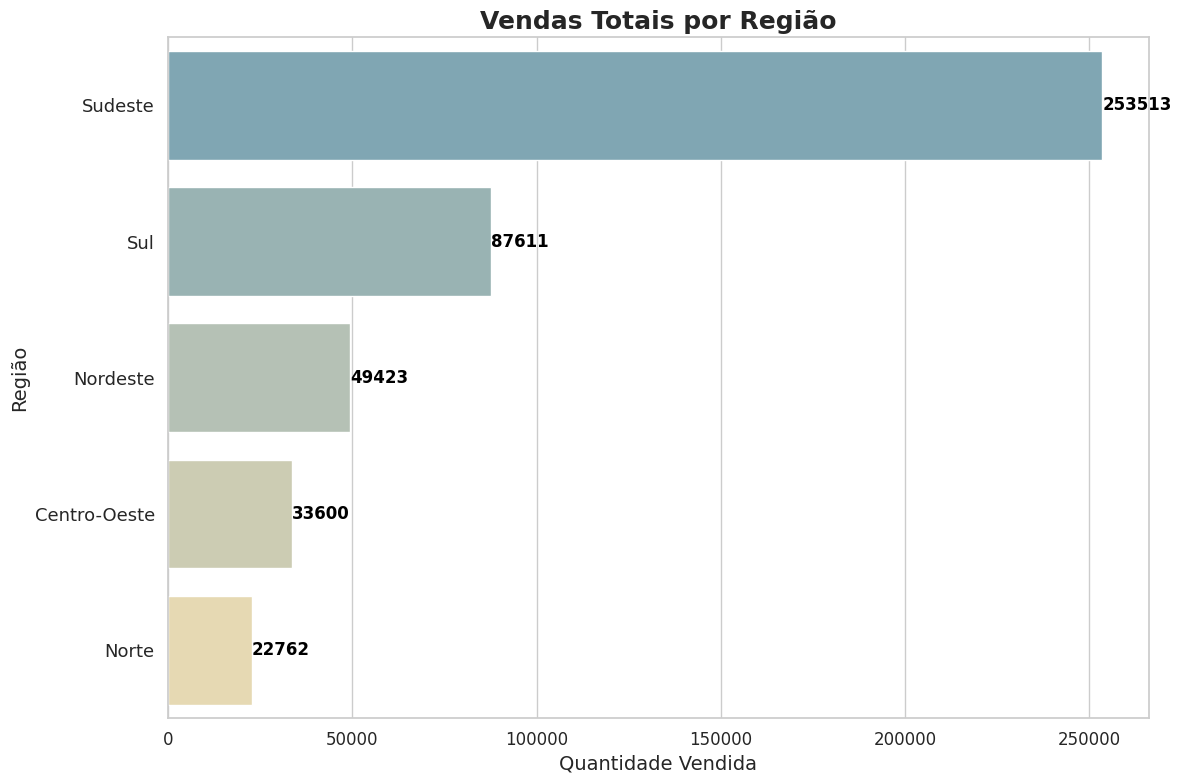

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar arquivo Excel (ajuste o caminho se necessário)
df = pd.read_excel('Base Dados.xlsx')

# Agrupar por Região e somar QuantidadeItens
vendas_regiao = df.groupby('Regiao')['QuantidadeItens'].sum()

# Ordenar do maior para o menor (maior em cima)
vendas_regiao_sorted = vendas_regiao.sort_values(ascending=False)

plt.figure(figsize=(12,8))

palette = sns.color_palette("blend:#7AB,#EDA", len(vendas_regiao_sorted))

ax = sns.barplot(
    y=vendas_regiao_sorted.index,
    x=vendas_regiao_sorted.values,
    hue=vendas_regiao_sorted.index,
    palette=palette,
    dodge=False,
    legend=False
)

# Adicionar valores nas barras
for p in ax.patches:
    width = p.get_width()
    ax.annotate(
        f'{int(width)}',
        (width, p.get_y() + p.get_height() / 2),
        ha='left', va='center',
        fontsize=12, fontweight='bold', color='black'
    )

plt.title('Vendas Totais por Região', fontsize=18, weight='bold')
plt.xlabel('Quantidade Vendida', fontsize=14)
plt.ylabel('Região', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.show()


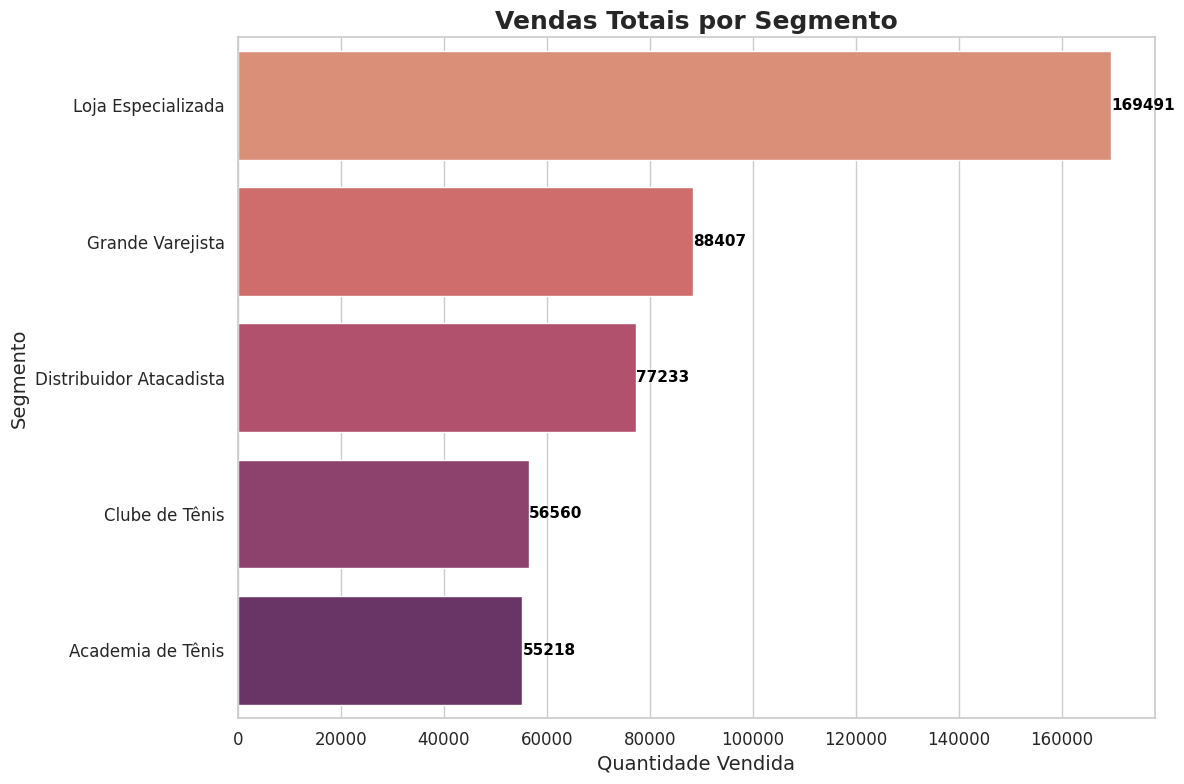

In [ ]:
# Agrupar por Segmento e somar a QuantidadeItens
vendas_segmento = df.groupby('Segmento')['QuantidadeItens'].sum()

# Ordenar as vendas do maior para o menor para o gráfico horizontal (maior em cima)
vendas_segmento = vendas_segmento.sort_values(ascending=False)

plt.figure(figsize=(12,8))

palette = sns.color_palette("flare", len(vendas_segmento))

ax = sns.barplot(
    y=vendas_segmento.index,
    x=vendas_segmento.values,
    hue=vendas_segmento.index,
    palette=palette,
    dodge=False,
    legend=False
)

# Adicionar os valores nas barras
for p in ax.patches:
    width = p.get_width()
    ax.annotate(
        f'{int(width)}',
        (width, p.get_y() + p.get_height() / 2.),
        ha='left',
        va='center',
        fontsize=11,
        fontweight='bold',
        color='black'
    )

plt.title('Vendas Totais por Segmento', fontsize=18, weight='bold')
plt.xlabel('Quantidade Vendida', fontsize=14)
plt.ylabel('Segmento', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


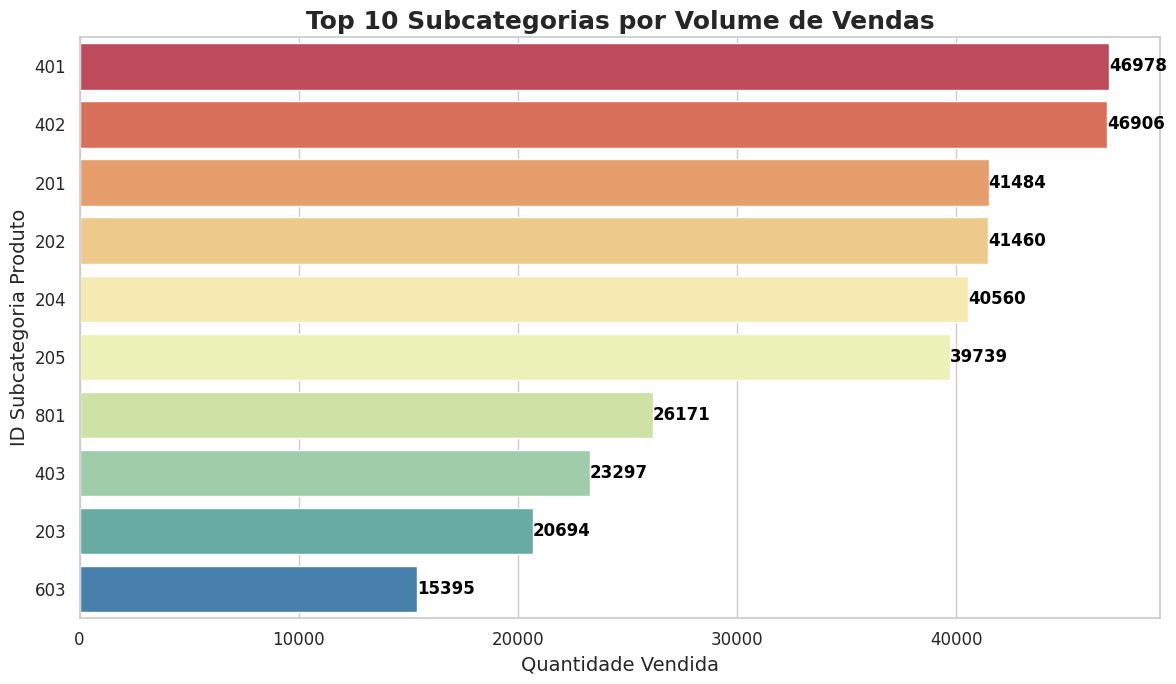

In [ ]:
# Top 10 Subcategorias por volume de vendas - gráfico horizontal com valores nas barras.
vendas_subcat = df.groupby('IDSubcategoriaProduto')['QuantidadeItens'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,7))

palette = sns.color_palette("Spectral", len(vendas_subcat))

ax = sns.barplot(
    y=vendas_subcat.index.astype(str),
    x=vendas_subcat.values,
    hue=vendas_subcat.index.astype(str),  # evita warning
    palette=palette,
    dodge=False,
    legend=False
)

# Adicionar valores nas barras.
for p in ax.patches:
    width = p.get_width()
    ax.annotate(
        f'{int(width)}',
        (width, p.get_y() + p.get_height() / 2.),
        ha='left', va='center',
        fontsize=12, fontweight='bold', color='black'
    )

plt.title('Top 10 Subcategorias por Volume de Vendas', fontsize=18, weight='bold')
plt.xlabel('Quantidade Vendida', fontsize=14)
plt.ylabel('ID Subcategoria Produto', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


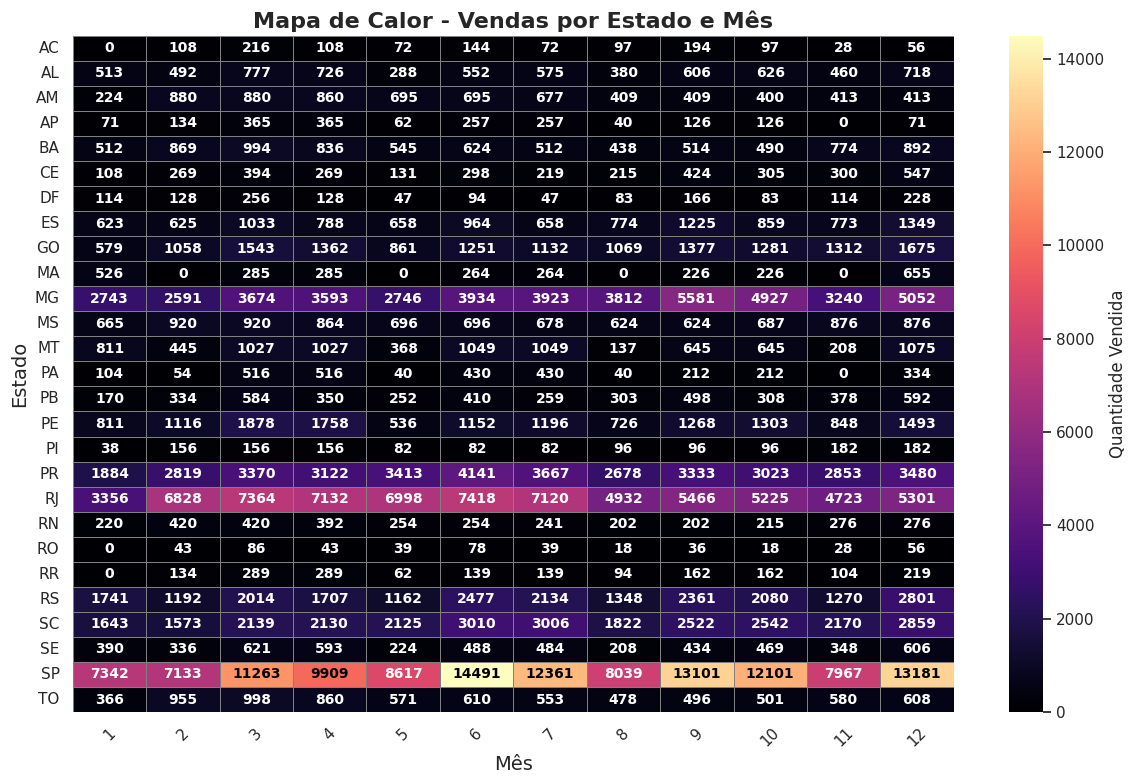

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Supondo que seu DataFrame original seja 'df'

# Criar a tabela pivô: linhas = Estado, colunas = Mes, valores = soma QuantidadeItens
vendas_estado_mes = df.pivot_table(
    index='Estado',
    columns='Mes',
    values='QuantidadeItens',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(12,8))

ax = sns.heatmap(
    vendas_estado_mes,
    annot=False,
    fmt='g',
    cmap='magma',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Quantidade Vendida'}
)

# Adicionar os valores no centro dos quadrados com cor adequada
for y in range(vendas_estado_mes.shape[0]):
    for x in range(vendas_estado_mes.shape[1]):
        valor = vendas_estado_mes.iloc[y, x]
        cor = 'white' if valor < vendas_estado_mes.values.max() * 0.6 else 'black'
        ax.text(
            x + 0.5,
            y + 0.5,
            f'{valor}',
            ha='center',
            va='center',
            color=cor,
            fontsize=10,
            fontweight='bold'
        )

plt.title('Mapa de Calor - Vendas por Estado e Mês', fontsize=16, weight='bold')
plt.ylabel('Estado', fontsize=14)
plt.xlabel('Mês', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Erro Quadrático Médio (MSE): 447.27 — quanto menor, melhor o modelo.
Coeficiente de Determinação (R²): 0.35 — próximo de 1 indica bom ajuste.


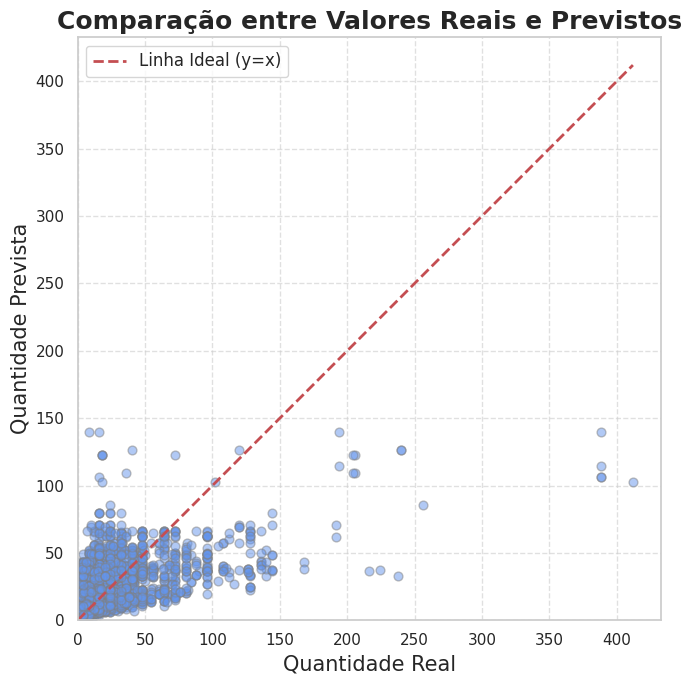

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Supondo que seu DataFrame principal já esteja carregado como 'df'

# 1. Preparar as variáveis preditoras (X) e alvo (y)
X = df[['Ano', 'Mes', 'Regiao', 'Segmento']]
y = df['QuantidadeItens']

# 2. Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Definir colunas categóricas e numéricas para pré-processamento
categorical_features = ['Regiao', 'Segmento']
numeric_features = ['Ano', 'Mes']

# 4. Criar pré-processador que transforma variáveis categóricas com OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'  # Mantém as colunas numéricas sem alteração
)

# 5. Construir pipeline que faz pré-processamento e treina o modelo Random Forest
modelo = Pipeline([
    ('preprocessador', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# 6. Treinar o modelo com os dados de treino
modelo.fit(X_train, y_train)

# 7. Fazer previsões com os dados de teste
y_pred = modelo.predict(X_test)

# 8. Avaliar o desempenho do modelo com MSE e R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Erro Quadrático Médio (MSE): {mse:.2f} — quanto menor, melhor o modelo.')
print(f'Coeficiente de Determinação (R²): {r2:.2f} — próximo de 1 indica bom ajuste.')

# 9. Visualizar os valores reais vs previstos em gráfico de dispersão (melhorado)
plt.figure(figsize=(9,7))

plt.scatter(
    y_test, y_pred,
    alpha=0.5,
    s=40,          # tamanho dos pontos
    edgecolors='gray',
    color='cornflowerblue'
)

# Linha ideal (y=x)
plt.plot(
    [0, max(y_test.max(), y_pred.max())],
    [0, max(y_test.max(), y_pred.max())],
    'r--',
    lw=2,
    label='Linha Ideal (y=x)'
)

plt.xlabel('Quantidade Real', fontsize=15)
plt.ylabel('Quantidade Prevista', fontsize=15)
plt.title('Comparação entre Valores Reais e Previstos', fontsize=18, weight='bold')

plt.legend(fontsize=12)

plt.grid(which='major', linestyle='--', alpha=0.6)

plt.xlim(0, max(y_test.max(), y_pred.max()) * 1.05)
plt.ylim(0, max(y_test.max(), y_pred.max()) * 1.05)

plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()


# Como interpretar o gráfico

- Cada ponto representa um par: quantidade real vendida (eixo X) e quantidade prevista pelo modelo (eixo Y).

- A linha vermelha tracejada representa o cenário ideal onde o valor previsto é exatamente igual ao real (linha y = x).

- Pontos próximos dessa linha indicam boas previsões.

- Pontos afastados indicam erros maiores (modelo errou ao prever).

## E os resultados da métrica?

- **MSE = 447.27** — quanto menor, melhor, e está menor que nos modelos anteriores, ótimo sinal.

- **R² = 0.35** — indica que o modelo explica cerca de 35% da variação das vendas. Ainda pode melhorar, mas é um avanço comparado aos modelos lineares simples anteriores.

## Por que ainda há pontos distantes da linha?

- Vendas podem ter muita variabilidade natural, sazonalidade, eventos específicos, que o modelo não captura.

- Pode ser interessante tentar modelos mais complexos ou incluir mais variáveis.
